<a href="https://colab.research.google.com/github/Acarreno96/Mine/blob/main/Class_06_04_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This one was definitely a chanllenge!

I've come to realized that ChatGPT has been my best friend thorugh out this course!

For this assigment; I chose to go with a "Supervised Classification Model" using RandomForest.

I will start with the challanges (those are always fun!). The main challange for me were the "Features" and the model itself. I couldnt figure out what the features were in the begging. I quickly figure I'll ask ChatGPT to help idetify these. I came to realize it was the column labeled first_name, last_name, "dob", etc.

When it comes to the actual modeling; I went back and forth between Chatgpt and resources you kindly provided to us. I also went back to the Class #4 assigment we did a couple weeks ago. That is how I was able to understand the steps Chatgpt was giving me. I pretty much just worked with the steps Chatgpt provided and compared the codes. When I ran the code and the graphics populated it look similar to the class #4 assigment model we worked on; a side from the scale. I noticed the "squared" looking model is a Randomforest model(hopefully thats correct).

All in all; I beleive model #1 distinguishes between Real and Synthetic samples fairly well. It appears as though the persion in this model is quite high. With the Precision,Recall,F1-Score:ROC-AUC all coming at 1.0. Which is what I think we could expect on a "Supervised Classification Model".


On Model #2 It seems that the main fetures were credit score, age, and app recency days.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       935
           1       1.00      1.00      1.00        65

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



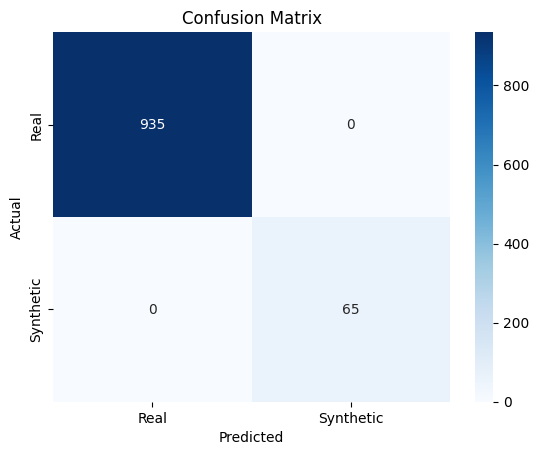

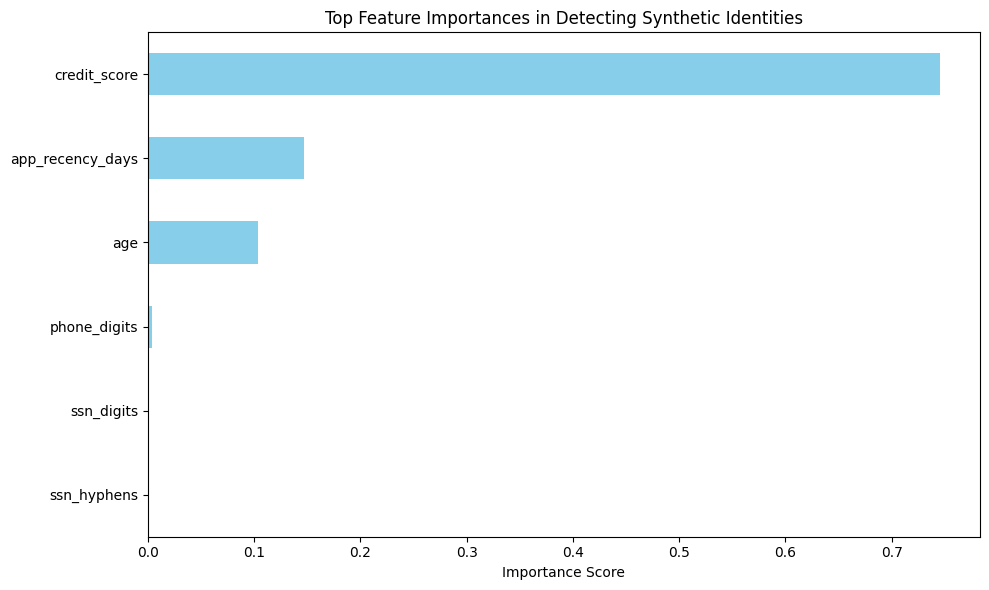


Model Evaluation Metrics:
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


df = pd.read_csv("synthetic_identity_applications.csv")
df.head()

df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
df["application_date"] = pd.to_datetime(df["application_date"], errors="coerce")

df["age"] = (df["application_date"] - df["dob"]).dt.days // 365
df["app_recency_days"] = (datetime.today() - df["application_date"]).dt.days
df["ssn_digits"] = df["ssn"].str.replace("-", "").str.len()
df["ssn_hyphens"] = df["ssn"].str.count("-")
df["phone_digits"] = df["phone"].str.replace(r"\D", "", regex=True).str.len()

df_model = df.drop(columns=["first_name", "last_name", "dob", "ssn", "address",
"phone", "email", "application_date"])

X = df_model.drop("is_synthetic", axis=1)
y = df_model["is_synthetic"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Real", "Synthetic"],
            yticklabels=["Real", "Synthetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(10).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top Feature Importances in Detecting Synthetic Identities")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

joblib.dump(rf, "random_forest_model.joblib")

y_pred = rf.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Dataset Shape: (5000, 10)


,first_name,last_name,dob,ssn,address,phone,email,credit_score,application_date,is_synthetic
0,Neil,Sanders,1990-05-24,128-49-1382,"12802 Bennett Plaza Apt. 671, Jonesshire, TX 3...",859.531.6177,jacob63@example.net,668,2023-07-08,0
1,Brian,Rodriguez,1960-05-24,722-47-3894,"57699 Amber Harbors Suite 807, Adrianshire, AS...",001-717-253-6395x97861,madisongutierrez@example.org,659,2024-08-15,0
2,Christopher,Sims,1938-05-24,123-66-1440,"466 Beasley Knolls Suite 521, Larsonstad, PW 9...",930.653.9039,xmolina@example.org,600,2023-10-05,0
3,Yolanda,Price,1998-05-24,821-77-6406,"PSC 9154, Box 7534, APO AE 65017",(581)302-5863x4928,jaustin@example.net,715,2025-03-05,0
4,Marcus,Gibbs,1949-05-24,461-65-5278,"448 White Ramp, Mejiaberg, AR 46137",3023663815,diane82@example.org,764,2024-09-22,0



Missing Values:
Series([], dtype: int64)

Summary Statistics:


,credit_score,is_synthetic
count,5000.000000,5000.000000
mean,701.859200,0.070000
std,98.411158,0.255173
min,300.000000,0.000000
25%,651.000000,0.000000
50%,705.000000,0.000000
75%,759.000000,0.000000
max,999.000000,1.000000


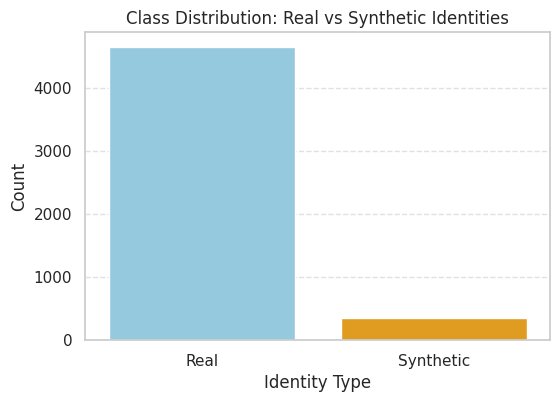

Numeric columns used for correlation matrix:
['credit_score']
Not enough numeric features to create a correlation matrix.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('synthetic_identity_applications.csv')

print("Dataset Shape:", df.shape)
display(df.head())


missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])


print("\nSummary Statistics:")
display(df.describe())

df['is_synthetic'] = df['is_synthetic'].astype(str)

plt.figure(figsize=(6, 4))
sns.countplot(x='is_synthetic', data=df, hue='is_synthetic', palette={'0': 'skyblue', '1': 'orange'}, legend=False)
plt.title("Class Distribution: Real vs Synthetic Identities")
plt.xlabel("Identity Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Real', 'Synthetic'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

numeric_df = df.select_dtypes(include=['number'])

if 'is_synthetic' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['is_synthetic'])

print("Numeric columns used for correlation matrix:")
print(numeric_df.columns.tolist())

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
    plt.title("Correlation Matrix of Features")
    plt.show()
else:
    print("Not enough numeric features to create a correlation matrix.")